In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper

In [16]:
recitations = pd.read_csv('recitations.csv')
audio_metadata = pd.read_csv('audio_metadata.csv')
poems = pd.read_csv('poems.csv')
recitations = recitations.merge(audio_metadata, on='recitationId', how='inner')
recitations = recitations.merge(poems, on='poemId', how='inner')

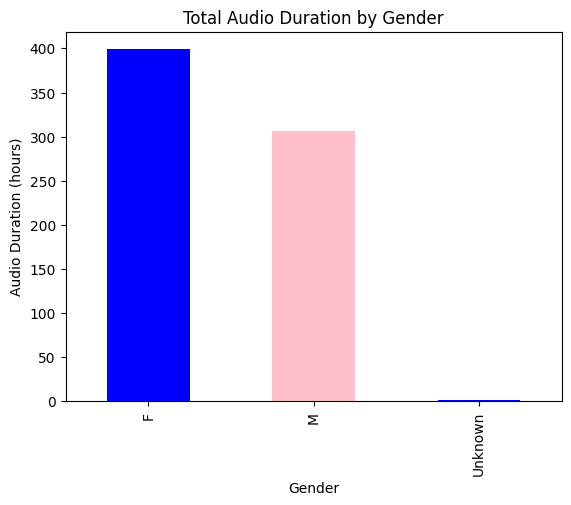

In [11]:
# Group by gender and sum audio durations
gender_durations = recitations.groupby('gender')['audioDuration'].sum()
gender_durations_in_hour = gender_durations / 3600
# Plot
gender_durations_in_hour.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Audio Duration by Gender')
plt.ylabel('Audio Duration (hours)')
plt.xlabel('Gender')
plt.show()

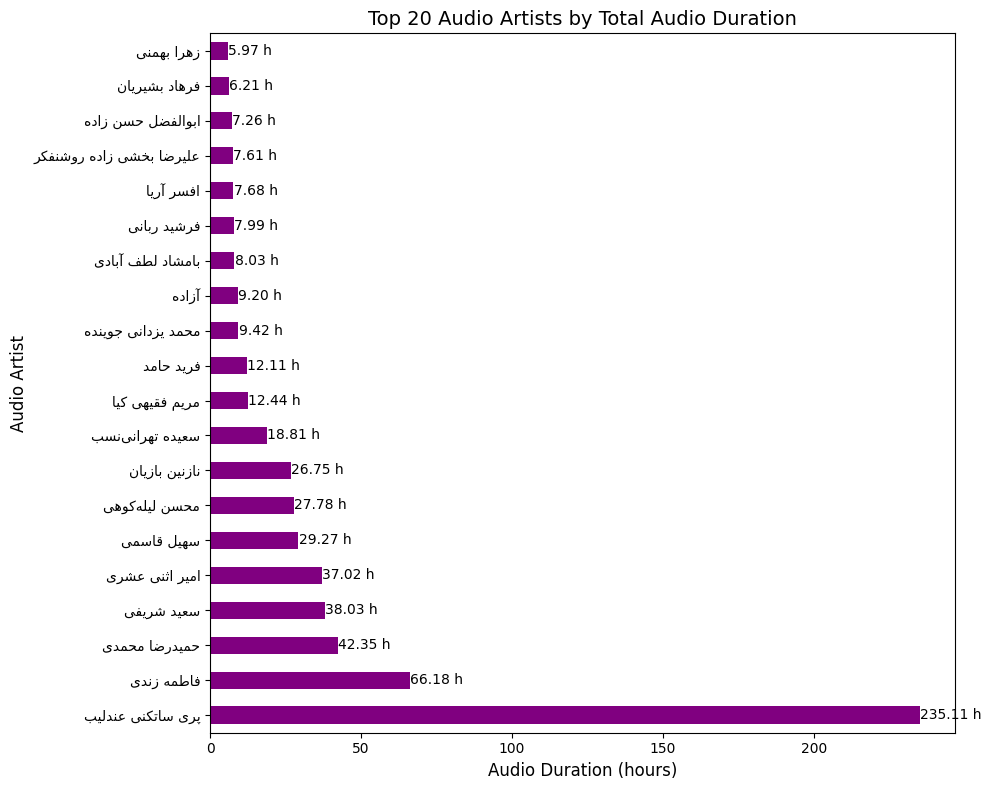

In [9]:
# Group by artist and sum audio durations
artist_durations = recitations.groupby('audioArtist')['audioDuration'].sum()

# Sort by duration
artist_durations = artist_durations.sort_values()
top_artists_durations = artist_durations.nlargest(20)
top_artists_durations.index = [bidialg.get_display(arabic_reshaper.reshape(name)) for name in top_artists_durations.index]
top_artists_durations_in_hours = top_artists_durations / 3600
# Plot
ax = top_artists_durations_in_hours.plot(kind='barh', figsize=(10, 8), color='purple')
for i, v in enumerate(top_artists_durations_in_hours):
    ax.text(v + 0.1, i, f'{v:.2f} h', va='center', ha='left', fontsize=10)
plt.title('Top 20 Audio Artists by Total Audio Duration', fontsize=14)
plt.xlabel('Audio Duration (hours)', fontsize=12)
plt.ylabel('Audio Artist', fontsize=12)

# Set y-tick labels
plt.yticks(ticks=range(len(top_artists_durations)), labels=top_artists_durations.index, horizontalalignment='right')

# Show plot
plt.tight_layout()
plt.show()

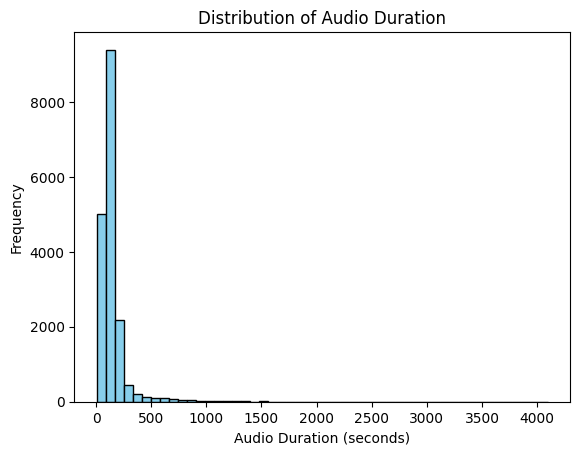

In [14]:
# Plot histogram of audio durations
recitations['audioDuration'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Audio Duration')
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Frequency')
plt.show()